In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.lda import LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
# Append the models to the models list
models = []
models.append(('RF' , RandomForestClassifier(n_estimators=100)))
models.append(('SVC' , LinearSVC()))
models.append(('NuSVC' , NuSVC()))
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LDA()))

In [10]:
def trainAndValidate(X, y, title, subplot):
    X = np.array(X)
    y = np.array(y)
    n = len(X)
    train_idx = int(n*.8)
    test_idx = int(n*.9)
    
    X_train = X[:train_idx,:]
    y_train = y[:train_idx]
    
    X_test = X[train_idx:test_idx,:]
    y_test = y[train_idx:test_idx]

    X_valid = X[test_idx:,:]
    y_valid = y[test_idx:]
    
    training_errors = []
    validation_errors = []
    names = []
    n_groups = len(models)

    # test models
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        train_error = sum(y_test!=y_pred)/len(y_test)
        training_errors.append(train_error)

        pred_valid = model.predict(X_valid)
        valid_error = sum(np.array(y_valid)!=np.array(pred_valid))/len(y_valid)
        validation_errors.append(valid_error)
        accu_score = accuracy_score(y_test, y_pred)
        names.append(name)

    # plot
    ax = plt.subplot(1, 2, subplot)
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar(index, training_errors, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Error')

    rects2 = plt.bar(index + bar_width, validation_errors, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Validation Error')

    #labels
    for i, v in enumerate(validation_errors):
        ax.text(index[i]+.10, v+.003, str(round(v,2)), color='red', fontweight='bold')
    for i, v in enumerate(training_errors):
        ax.text(index[i]-.25, v+.003, str(round(v,2)), color='blue', fontweight='bold')

    plt.xlabel('Model')
    plt.ylabel('Error')
    plt.ylim(0,1)
    plt.title(title)
    plt.xticks(index + bar_width, names)
    plt.legend()
    plt.show()

987


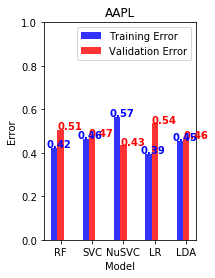

895


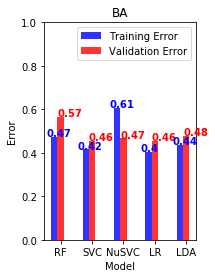

486


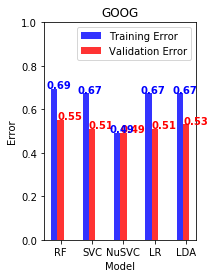

331


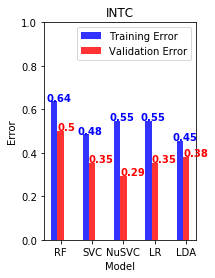

374


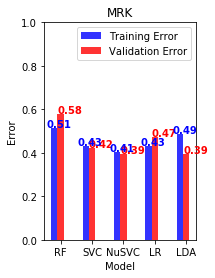

In [11]:
companies = ['AAPL', 'BA', 'GOOG', 'INTC', 'MRK']
for company in companies:
    # Load data
    newsData = pd.read_csv("News/sentiment_" + company + ".csv", encoding = "ISO-8859-1")
    stockData = pd.read_csv("Prices/label_" + company + ".csv")
    newsData = newsData.rename(columns={"trading_date":"date"}) # rename column
    
    # Merge data frames
    merged_df = newsData[['date', 'compound','neg','neu','pos']].merge(stockData[['date','label']], how='inner', on='date', left_index=True)
    
    # Prepare samples and labels
    X = merged_df.loc[:,'compound':'pos']
    y = merged_df.loc[:,'label']
    
    print (len(X))
    
    # Train, test and plot
    trainAndValidate(X, y, company, 2)
    plt.show()